<a href="https://colab.research.google.com/github/LeeYeonGeol/ML_DL_Practice/blob/main/CIFAR10_(CNN)_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [3]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat',  'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


# CIFAR10 데이터 시각화

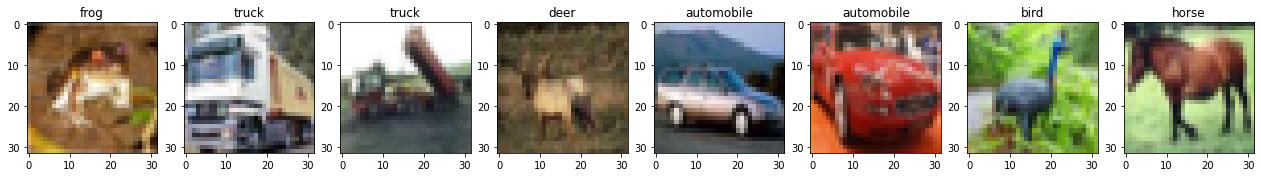

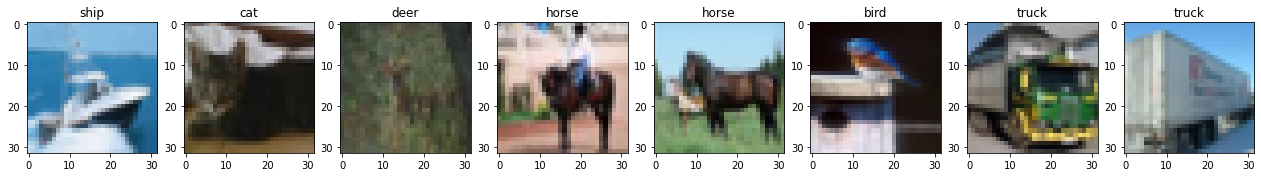

In [4]:
import cv2

def show_images(images, labels, ncols=8):
  figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
  for i in range(ncols):
    axs[i].imshow(images[i])
    label = labels[i].squeeze()
    axs[i].set_title(NAMES[int(label)])

show_images(train_images[:8], train_labels[:8], ncols = 8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

# 데이터 전처리

In [5]:
def get_preprocessed_data(images, labels):
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)

  return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [6]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [7]:
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [8]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

In [9]:
IMAGE_SIZE = 32

In [10]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Flatten(name='flatten')(x)
x = Dropout(rate=.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation (Activation)      (None, 16, 16, 64)        0     

In [11]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30 ,validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 20s 27ms/step - loss: 1.9146 - accuracy: 0.2770 - val_loss: 1.3852 - val_accuracy: 0.5080
Epoch 2/30
665/665 [==============================] - 17s 26ms/step - loss: 1.2453 - accuracy: 0.5522 - val_loss: 1.0068 - val_accuracy: 0.6385
Epoch 3/30
665/665 [==============================] - 17s 26ms/step - loss: 1.0124 - accuracy: 0.6388 - val_loss: 1.0958 - val_accuracy: 0.6207
Epoch 4/30
665/665 [==============================] - 17s 26ms/step - loss: 0.8937 - accuracy: 0.6889 - val_loss: 0.8379 - val_accuracy: 0.7084
Epoch 5/30
665/665 [==============================] - 17s 26ms/step - loss: 0.7861 - accuracy: 0.7207 - val_loss: 0.7596 - val_accuracy: 0.7336
Epoch 6/30
665/665 [==============================] - 17s 26ms/step - loss: 0.7024 - accuracy: 0.7550 - val_loss: 0.6934 - val_accuracy: 0.7612
Epoch 7/30
665/665 [==============================] - 17s 26ms/step - loss: 0.6541 - accuracy: 0.7681 - val_loss: 0.7247 - val_accuracy:

313/313 [==============================] - 2s 7ms/step - loss: 0.7017 - accuracy: 0.7951


[0.7016650438308716, 0.7950999736785889]

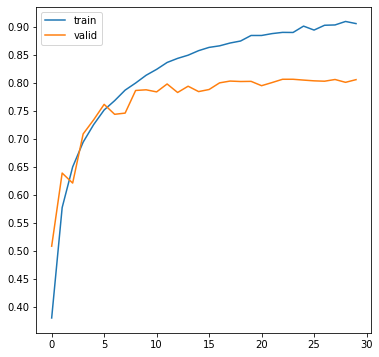

In [13]:
def show_history(history):
  plt.figure(figsize=(6, 6))
  plt.yticks(np.arange(0, 1, 0.05))
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='valid')
  plt.legend()

show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

In [14]:
preds = model.predict(np.expand_dims(test_images[0], axis = 0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (1, 10)
예측 결과: [[6.2507555e-09 1.6035273e-09 3.7757240e-05 9.9630702e-01 2.7866536e-08
  2.9185466e-03 7.3243794e-04 1.8719621e-09 4.3041950e-06 1.7170751e-09]]


In [15]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (32, 10)
예측 결과: [[6.25073149e-09 1.60353653e-09 3.77569522e-05 9.96307015e-01
  2.78661645e-08 2.91855074e-03 7.32435787e-04 1.87197635e-09
  4.30417867e-06 1.71708825e-09]
 [2.85288297e-05 5.92206838e-04 4.67221341e-15 2.93888422e-13
  6.24312119e-17 8.45220925e-18 2.97877059e-14 3.78267603e-16
  9.99370158e-01 9.22014624e-06]
 [2.25300103e-01 1.01326229e-02 5.78582294e-05 1.30344764e-04
  2.66518036e-05 1.44366982e-06 1.77823551e-06 1.52643144e-04
  7.30866730e-01 3.33298557e-02]
 [6.50934696e-01 2.76148762e-03 2.96071172e-04 9.92730056e-05
  5.24441975e-06 4.14750446e-07 3.98137036e-06 6.08441042e-06
  3.36854190e-01 9.03851818e-03]
 [1.26107182e-07 1.36206737e-07 2.16813758e-03 1.30275218e-03
  8.22512433e-03 5.32340800e-06 9.88298297e-01 1.60769398e-09
  7.54908598e-08 2.40209239e-08]
 [6.14198200e-07 3.02161288e-06 1.21654302e-03 3.30790579e-02
  1.15071945e-02 1.12938084e-01 8.41235876e-01 1.36630379e-05
  2.87764607e-07 5.73892657e-06]
 [1.82257779e-03 9.48672056e-

In [16]:
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3 8 8 0 6 6 1 3 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 9 4 0 9 6 6 5]


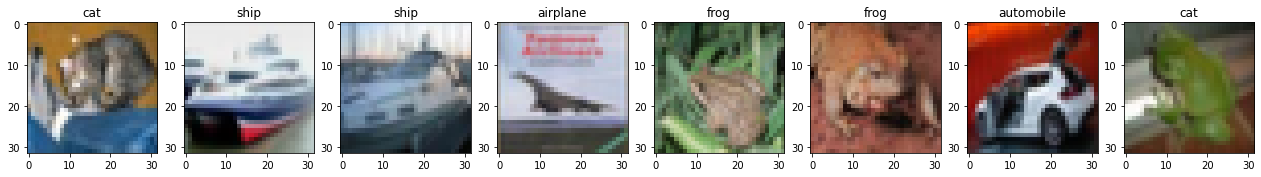

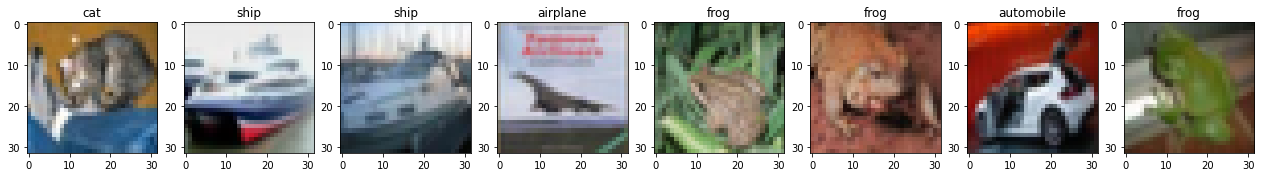

In [17]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)